In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Overview

## 문제 정의
> 1912년 4월 15일 타이타닉호 침몰
> 총 2224명 중 1502명이 사망한 사건
- 문제 해결 목표: 생존-사망 데이터를 분석하여 생존 가능성이 더 높은 사람의 유형을 예측하는 모델 구축

## train.csv 데이터 셋 설명
- 탑승객의 일부(891명)에 대한 승객 정보
- columns
    - PassengerId: 승객 고유번호(int)
    - Survived: 생존 여부(int, 0: 사망, 1: 생존)
    - Pclass: 탑승권 등급(int, 1: 1st, 2: 2nd, 3: 3rd)
    - Name: 승객 이름(object(str))
    - Sex: 승객 성별(object(str))
    - Age: 승객 나이(float, 1보다 작으면 분수, 추정된 나이는 xx.5의 형태)
    - SibSp: 동승자 수-형제자매&부부(int, 단 정부나 약혼자는 제외) 
    - Parch: 동승자 수-부모자식(int, 단 유모와만 탄 아이는 0)
    - Ticket: 탑승권 번호(object(str))
    - Fare: 여객 요금(float)
    - Cabin: 선실 번호(object(str))
    - Embarked: 승선 항구(object(str), C: Cherbourg, Q: Queenstown, S: Southampton)

In [2]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check Data

In [3]:
# 데이터 로드
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 데이터 형태 파악
- train_df와 test_df의 차이: Survived 컬럼 유무, train_df는 지도학습을 위해 Survived 정보 있고, test_df는 예측을 위해 Survived 컬럼 없음<br/>
&rarr; target 변수: Survived
- train_df Null coloumns: 나이, 선실, 승선 항구
- test_df Null columns: 나이, 여객 요금, 선실

In [10]:
train_df.describe() # data type이 수치형인 변수들의 통계치

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Categorical 변수들 생존-사망 시각화
- Survived: target, 종속 변수, 0 or 1 categorical
- Pclass: 독립변수, 1 or 2 or 3 categorical
- Sex: 독립변수, male or female categorical
- Embarked: 독립변수, C or Q or S categorical
<br/><br/>
1. Survived 개수 -> 불균형 데이터 확인  
2. 독립변수에 따른 Survived 개수 -> 데이터 분포 확인

Survived
0    549
1    342
Name: count, dtype: int64


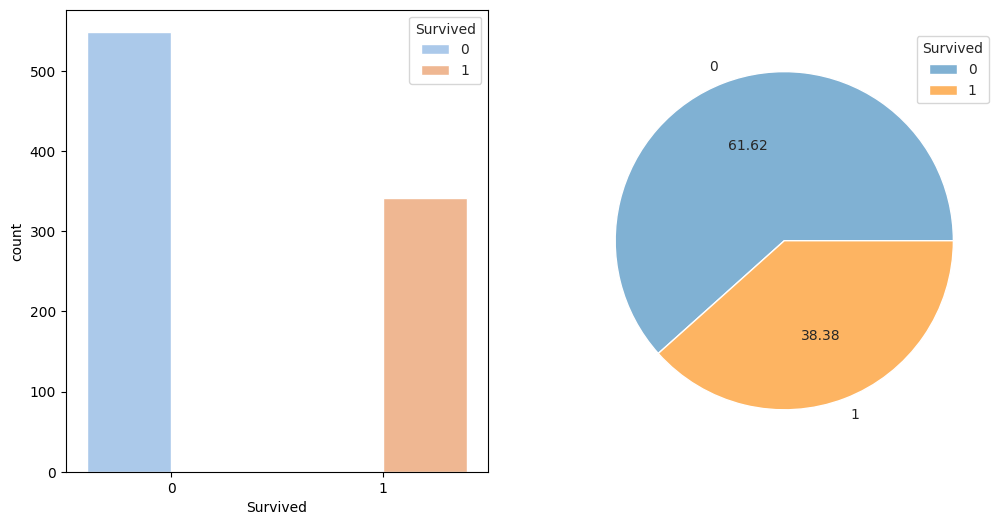

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.countplot(train_df,x='Survived', hue = 'Survived', palette = 'pastel')

print(train_df['Survived'].value_counts())

plt.subplot(1,2,2)
colors = sns.color_palette('Set3')
plt.pie(train_df['Survived'].value_counts().values, labels = [0, 1], colors = colors[4:6], autopct = '%.2f' )
plt.legend(title='Survived')
plt.show()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


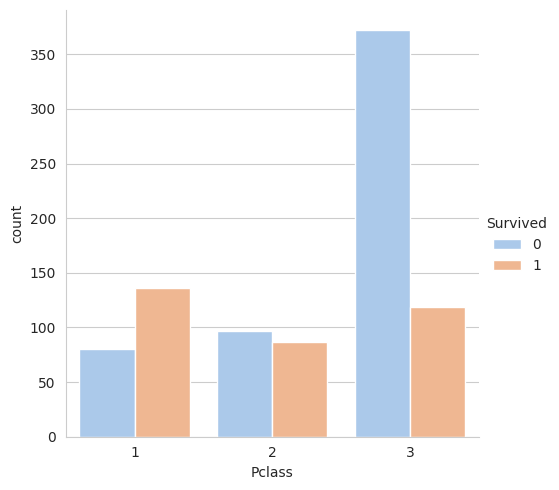

In [13]:
sns.set_style('whitegrid')
sns.catplot(train_df, x='Pclass', hue = 'Survived', palette = 'pastel', kind = 'count')
train_df.groupby(['Pclass','Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


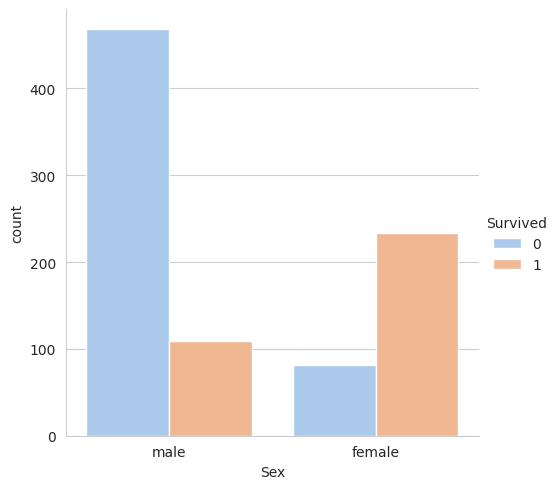

In [14]:
sns.set_style('whitegrid')
sns.catplot(train_df, x='Sex', hue = 'Survived', palette = 'pastel', kind = 'count')
train_df.groupby(['Sex','Survived']).size().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


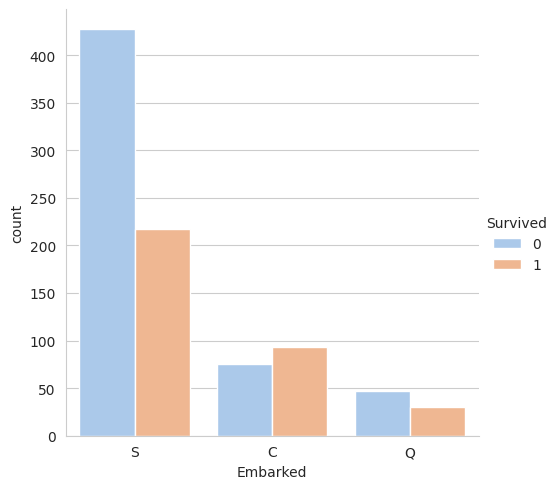

In [15]:
sns.set_style('whitegrid')
sns.catplot(train_df, x='Embarked', hue = 'Survived', palette = 'pastel', kind = 'count')
train_df.groupby(['Embarked','Survived']).size().unstack()